In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset
data = pd.read_csv("mall_customers.csv")
print(data)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [4]:
x=data.iloc[:,3:]

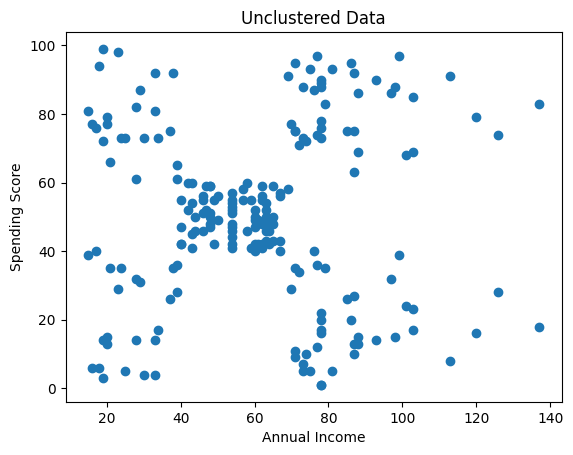

In [5]:
plt.title("Unclustered Data")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])

In [6]:
km=KMeans(n_clusters=3)

In [7]:
km.fit_predict(x)

/opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [8]:
#Sum Squared error number of clusters increase SSE value decreases
km.inertia_

106348.37306211118

In [9]:
sse=[]
for k in range(1,16):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

/opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/skle

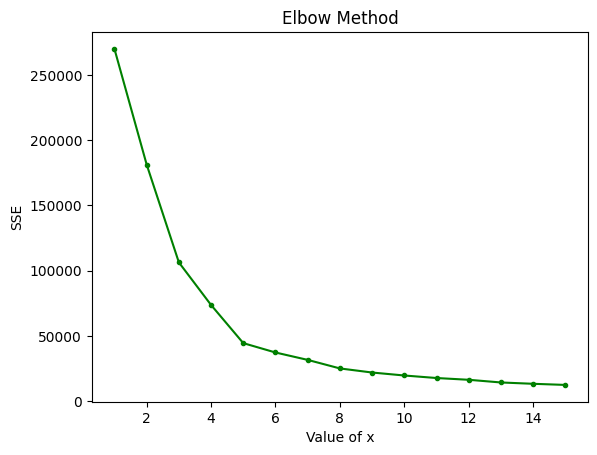

In [10]:
plt.title("Elbow Method")
plt.xlabel("Value of x")
plt.ylabel("SSE")
plt.plot(range(1,16),sse,marker='.',color="green")

In [11]:
silh=[]
for k in range(2,16):
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)
    silh.append(score)

/opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/skle

In [12]:
silh

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5281944387251989,
 0.4576023919383676,
 0.45912667975312715,
 0.44852830611106603,
 0.4345202129394298,
 0.423628333260055,
 0.4273108243587198,
 0.4200183060603937,
 0.41342721960170153]

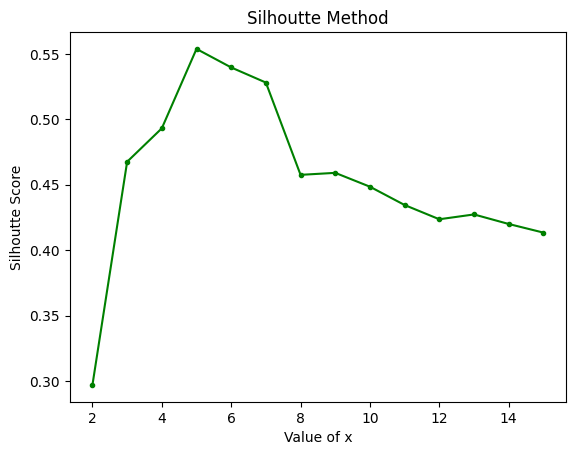

In [13]:
plt.title("Silhoutte Method")
plt.xlabel("Value of x")
plt.ylabel("Silhoutte Score")
plt.plot(range(2,16),silh,marker='.',color="green")

In [14]:
km=KMeans(n_clusters=5)

In [15]:
labels=km.fit_predict(x)

/opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
labels

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

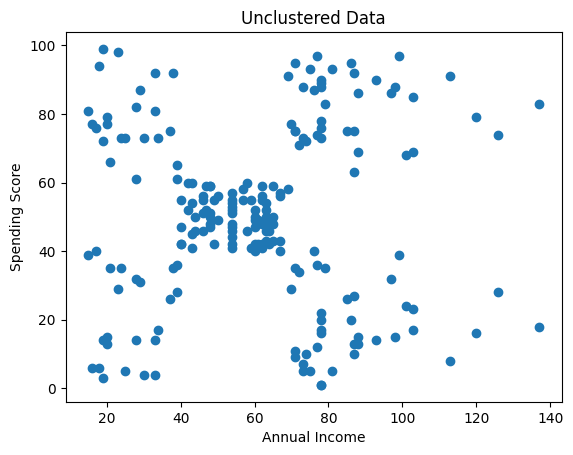

In [17]:
plt.title("Unclustered Data")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])



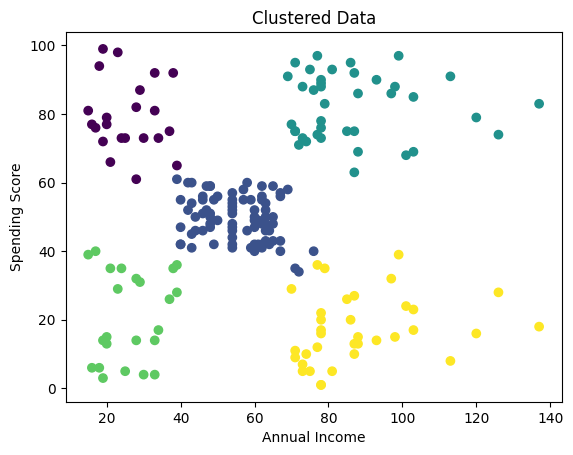

In [18]:
plt.title("Clustered Data")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=labels)

In [19]:
data[labels==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
124,125,Female,23,70,29
128,129,Male,59,71,11
130,131,Male,47,71,9
134,135,Male,20,73,5
136,137,Female,44,73,7
138,139,Male,19,74,10
140,141,Female,57,75,5
144,145,Male,25,77,12
146,147,Male,48,77,36
148,149,Female,34,78,22


In [20]:
km.predict([[46,78]])

/opt/homebrew/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [21]:
clusters = km.cluster_centers_
clusters

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [22]:
agl=AgglomerativeClustering(n_clusters=5)
alabels=agl.fit_predict(x)

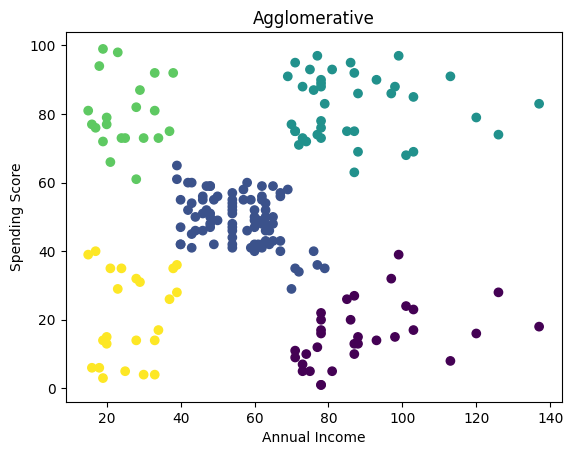

In [23]:
plt.title("Agglomerative")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=alabels)



/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'KMeans'}, xlabel='Annual Income', ylabel='Spending Score'>

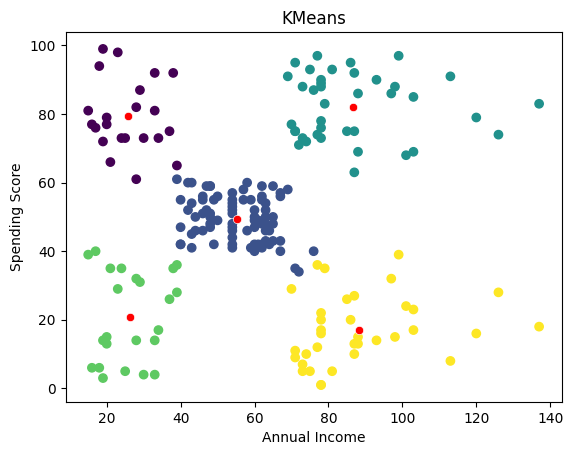

In [24]:
plt.title("KMeans")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=labels)
sb.scatterplot(x=clusters[:,0], y=clusters[:,1],color='red')



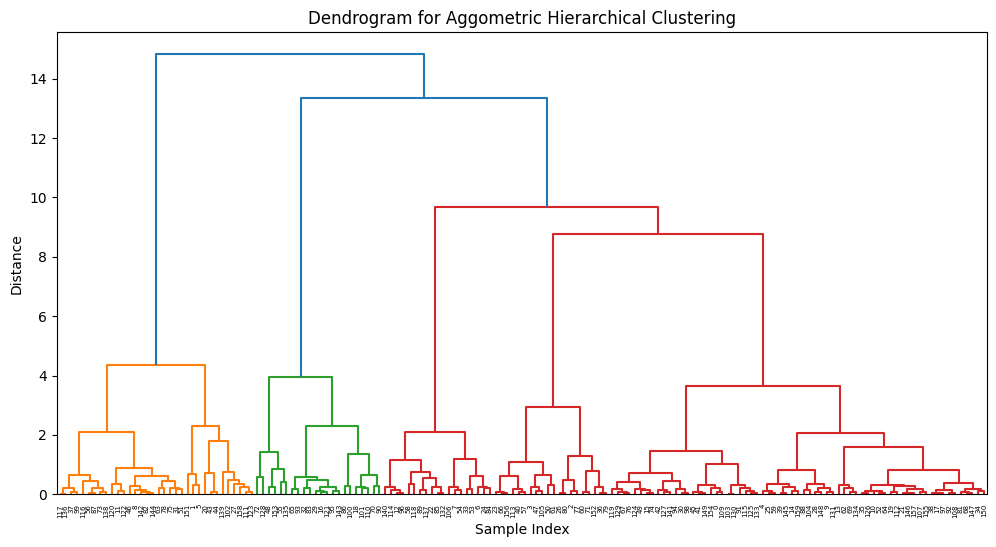

In [25]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Train-Test Split
X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Perform hierarchical clustering
linkage_matrix = linkage(X_train, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Aggometric Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
